<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/Transfer_Learning_Image_Classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

--2020-04-14 10:07:12--  https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20160500 (19M) [application/zip]
Saving to: ‘image_data.zip’

image_data.zip      100%[===================>]  19.23M  49.1MB/s    in 0.4s    

2020-04-14 10:07:12 (49.1 MB/s) - ‘image_data.zip’ saved [20160500/20160500]



In [0]:
!unzip image_data.zip

Archive:  image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data/data/dog

In [0]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [0]:
names = os.listdir("image_data/data")
names

['dogs', 'horses', 'Humans']

In [0]:
x = []
y = []

for folder in names:
  files = os.listdir("image_data/data/"+folder)
  for file in files:
    img = image.load_img("image_data/data/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(606, 200, 200, 3)
(606,)


In [0]:
# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(606, 3)


In [0]:
#scale the data
x = x/255

In [0]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

# Building a CNN from Scratch

In [0]:
from tensorflow.keras import models,layers

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(180,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 1s 64ms/step - loss: 1.4246 - accuracy: 0.3306 - val_loss: 1.0963 - val_accuracy: 0.3689
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0869 - accuracy: 0.3595 - val_loss: 1.0659 - val_accuracy: 0.4098
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0481 - accuracy: 0.4669 - val_loss: 1.0319 - val_accuracy: 0.4262
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0514 - accuracy: 0.4525 - val_loss: 1.0387 - val_accuracy: 0.4098
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0002 - accuracy: 0.4690 - val_loss: 1.0538 - val_accuracy: 0.4672
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0375 - accuracy: 0.4731 - val_loss: 0.9664 - val_accuracy: 0.4918
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0315 - accuracy: 0.4773 - val_loss: 1.0544 - val_accuracy: 0.3934
Epoch 8/20
16

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 196, 196, 20)      1520      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 192, 192, 30)      15030     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 96, 96, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 94, 94, 40)        10840     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 92, 92, 60)        21660     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 46, 46, 60)       

# Transfer Learning using Resnet50

In [0]:
from tensorflow.keras.applications import resnet50

model2 = resnet50.ResNet50(weights='imagenet')
model2.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [0]:
# load the model without last layer

input_layer = layers.Input(shape=(200,200,3))

model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
model2.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________

In [0]:
last_layer = model2.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(3,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [0]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
x = []
y = []

for folder in names:
  files = os.listdir("image_data/data/"+folder)
  for file in files:
    img = image.load_img("image_data/data/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(606, 200, 200, 3)
(606,)


In [0]:
# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(606, 3)


In [0]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [0]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 2s 129ms/step - loss: 4.4922 - accuracy: 0.7955 - val_loss: 2.0468e-06 - val_accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 1s 62ms/step - loss: 0.0455 - accuracy: 0.9979 - val_loss: 4.7214e-04 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 1s 62ms/step - loss: 0.0043 - accuracy: 0.9979 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.8684e-07 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 4.7800e-05 - accuracy: 1.0000 - val_loss: 5.3085e-08 - val_accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 2.1727e-06 - accuracy: 1.0000 - val_loss: 4.4703e-08 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 4.8795e-07 - accuracy: 1.0000 - val_loss: 4.3772

In [0]:
!wget https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/04/12185602/Lagotto-Romangolo-Tongue-Out.jpg


--2020-04-14 11:13:10--  https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/04/12185602/Lagotto-Romangolo-Tongue-Out.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.168.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.168.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34544 (34K) [image/jpeg]
Saving to: ‘Lagotto-Romangolo-Tongue-Out.jpg’

Lagotto-Romangolo-T 100%[===================>]  33.73K  --.-KB/s    in 0.06s   

2020-04-14 11:13:11 (531 KB/s) - ‘Lagotto-Romangolo-Tongue-Out.jpg’ saved [34544/34544]



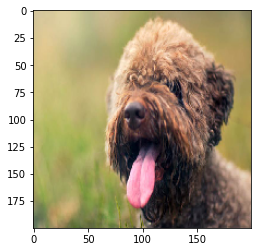

In [0]:
img = image.load_img("Lagotto-Romangolo-Tongue-Out.jpg",target_size=(200,200))
img = image.img_to_array(img)
import matplotlib.pyplot as plt
plt.imshow(img.astype('int32'))

In [0]:
img = resnet50.preprocess_input(img)
new_model.predict(img.reshape(1,200,200,3))

array([[1.000000e+00, 7.711114e-09, 6.138060e-33]], dtype=float32)

In [0]:
names

['dogs', 'horses', 'Humans']